# In this notebook I will explore techniques to evaluate and improve machine learning models

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.keras.backend.set_floatx('float64')
tf.autograph.set_verbosity(0)

In [22]:
dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0', dldarkblue =  '#0D5BDC')
dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0'; dldarkblue =  '#0D5BDC'
dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]

In [4]:
def gen_data(m, seed=1, scale=0.7):
    """ Generate a data set based on a x^2 with added noise """

    c = 0
    x_train = np.linspace(0,49,m)
    np.random.seed(seed)
    y_ideal = x_train**2 + c
    y_train = y_ideal + scale * y_ideal * (np.random.sample((m,))-0.5)
    x_ideal = x_train # for redraw when new data included in X
    return  x_train, y_train, x_ideal, y_ideal

# Split the data

In [ ]:
# Generate the data
X, y, x_ideal, y_ideal = gen_data(18, 2, 0.7)
print("X.shape:", X.shape, "y.shape: ", y.shape)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print("X_train.shape:", X_train.shape, "y_train.shape", y_train.shape)
print("X_test.shape:", X_test.shape, "y_test.shape", y_test.shape)

X.shape: (18,) y.shape:  (18,)
X_train.shape: (12,) y_train.shape (12,)
X_test.shape: (6,) y_test.shape (6,)


# Plot Train, Test Sets

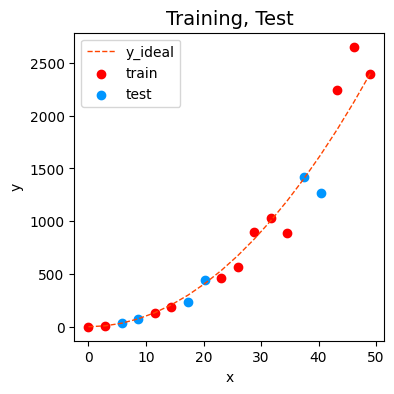

In [25]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color='orangered', label="y_ideal", lw=1)
ax.set_title("Training, Test", fontsize=14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color="r", label="train")
ax.scatter(X_test, y_test, color=dlc["dlblue"], label="test")
ax.legend(loc='upper left')
plt.show()

# Error Calculation for model evaluation, linear regression

$$\textbf{J}_{test} (\textbf{w},b) = $$